# Pattern Recognition Assignment 2.

## Μωράτης Κωνσταντίνος, 9589.

### Part A:

In [2]:
# install packages
!pip install sympy

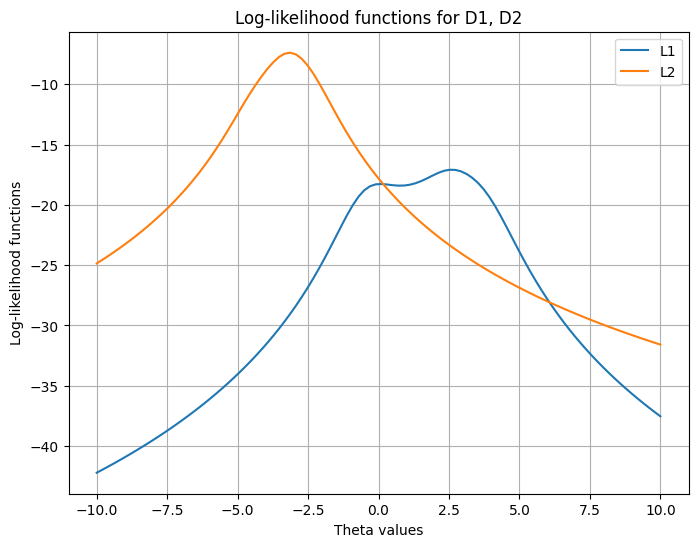

From data in D1 the estimation for theta (θ1) is:  [0.0564138790948391, 0.773097881995672, 2.59979561094459]
From data in D2 the estimation for theta (θ2) is:  [-3.15857667702677]


In [3]:
# Question 1:

# maximum-likelihood estimation

import numpy as np
import math
from matplotlib import pyplot as plt
from sympy import * 
from pylab import rcParams
  
n_theta = 100
min_theta = -10
max_theta = 10
D1 = np.array( [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1] )

D2 = np.array( [-4.5, -3.4, -3.1, -3.0, -2.3] )

theta = np.linspace(min_theta, max_theta, n_theta);

# calculating log-likelihood functions (L1, L2) for each theta value
all_L1 = np.zeros(n_theta)
all_L2 = np.zeros(n_theta)
counter1 = 0;
counter2 = 0;

for t in theta:
    L1 = 0;
    for x in D1:
    
        temp = np.log( 1 / ( math.pi * ( 1 + (x - t)**2 ) ) )
        L1 += temp
    all_L1[counter1] = L1
    counter1 += 1
    
    L2 = 0;
    for x in D2:
    
        temp = np.log( 1 / ( math.pi * ( 1 + (x - t)**2 ) ) )
        L2 += temp
    all_L2[counter2] = L2
    counter2 += 1

# creating diagram for L1 and L2 
rcParams["figure.figsize"] = (8,6) 
plt.plot(theta, all_L1,
        label='L1')

plt.plot(theta, all_L2,
        label='L2')

plt.xlabel("Theta values")
plt.ylabel("Log-likelihood functions")

plt.title("Log-likelihood functions for D1, D2")
plt.grid(True)
plt.legend()
plt.show()

# calculating maximum-likelihood estimations (e_θ1, e_θ2) for theta
t = symbols('t', real=True)
expr1 = 0
expr2 = 0

# creating the sum 
for x in D1:
    
    temp = (2 * (-t + x)) / ( 1 + ( x - t )**2 ) # the derivative of ln(p(x|t))
    expr1 += temp

# creating and solving the equation
eq1 = Eq(expr1, 0)
sol1 = solve(eq1, t)
print("From data in D1 the estimation for theta (θ1) is: ", sol1)


#creating the sum 
for x in D2:
    
    temp =  (2 * (-t + x)) / ( 1 + ( x - t )**2 ) # the derivative of ln(p(x|t))
    expr2 += temp

# creating and solving the equation
eq2 = Eq(expr2, 0)
sol2 = solve(eq2, t)
print("From data in D2 the estimation for theta (θ2) is: ", sol2)

For Θ1 = 0.056 ,	Θ2 = -3.159
g values for x in D1:  [1.79064285 2.30014128 1.66779176 1.96650209 2.43298218 1.57284967
 1.46601548]
g values for x in D2:  [-1.71423187 -2.1677263  -2.05462369 -1.97487313 -0.99115477]

For Θ1 = 0.773 ,	Θ2 = -3.159
g values for x in D1:  [2.30303853 1.6238818  0.97241237 2.56045731 1.78638536 1.98348703
 1.82906159]
g values for x in D2:  [-1.99468522 -2.52002963 -2.43274658 -2.36237079 -1.45730068]

For Θ1 = 2.6 ,	Θ2 = -3.159
g values for x in D1:  [ 3.89461214  0.18690451 -0.31250413  3.67779375  0.31092182  3.48640131
  3.14079826]
g values for x in D2:  [-2.573893   -3.2177295  -3.17127972 -3.11554452 -2.33047533]



[Text(0.5, 0, 'x values')]

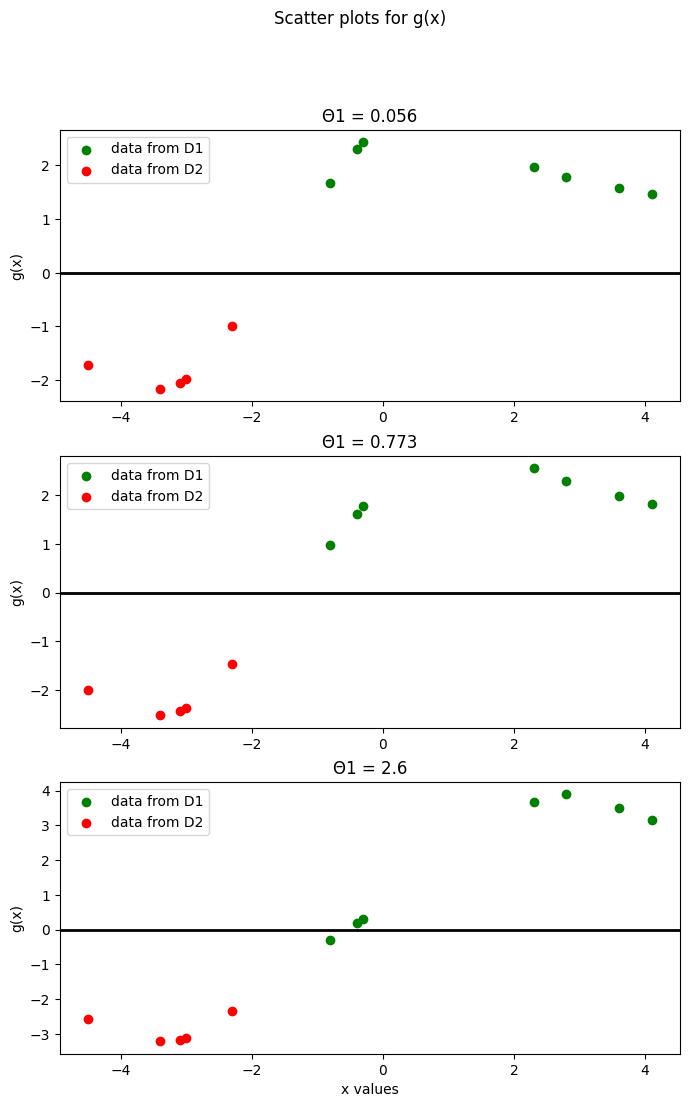

In [9]:
# Question 2: 

from copy import deepcopy

# creating Classifier class with 2 methods
class Classifier:
    
    # method fit for calculating log-likelihoods for each x, theta
    # inputs: Dataset D, vector of (θ1, θ2)
    def fit(D, thetas):
        
        #calculating likelikoods
        size = len(D)
        l1 = np.zeros(size)
        l2 = np.zeros(size)
        counter = 0
        t1 = thetas[0]
        t2 = thetas[1]
        
        for x in D:
            temp =  1 / ( math.pi * ( 1 + (x - t1)**2 ) )
            l1[counter] = np.log( temp )
            
            l2[counter] = np.log( 1 / ( math.pi * ( 1 + (x - t2)**2 ) ) )
            counter += 1
        
        return(l1, l2)
    
    # method predict for calculating g values for every x
    # inputs: Dataset D, vector of (θ1, θ2)
    def predict(D, thetas, priori1, priori2):
        
        # calling fit function to calculate likelihoods
        likelihoods = deepcopy(Classifier.fit(D, thetas)) #likelihoods[0] = l1, likelihoods[1] = l2
        size = len(D)
        g = np.zeros(size)
        
        for i in range(size):
            
            g[i] = likelihoods[0][i] - likelihoods[1][i] + np.log(priori1) - np.log(priori2)
        
        return(g)
        

count = 0
rcParams["figure.figsize"] = (8,12) 
fig, axs = plt.subplots(3)
fig.suptitle("Scatter plots for g(x)")
axs[0].axhline(y=0, xmin=0, c="black", linewidth=2)
axs[1].axhline(y=0, xmin=0, c="black", linewidth=2)
axs[2].axhline(y=0, xmin=0, c="black", linewidth=2)

# for every Θ1 value
for x in sol1:
        
    t1 = float(x)
    t2 = float(sol2[0])
    thetas = np.array([ t1, t2 ])
    priori1 = 7/12
    priori2 = 5/12
    
    print("For Θ1 =",round(t1,3), ",\tΘ2 =",round(t2,3),)
    
    # calling predict function to calculate g values for D1
    g1 = (Classifier.predict(D1, thetas, priori1, priori2))
    print("g values for x in D1: ", g1)

    # calling predict function to calculate g values for D2
    g2 = (Classifier.predict(D2, thetas, priori1, priori2))
    print("g values for x in D2: ", g2)
    print("")
    
    # creating the 3 scatter plots for g(x)
    axs[count].scatter(D1, g1,
               color='green',
               label='data from D1')
    axs[count].scatter(D2, g2,
               color='red',
               label='data from D2')

    axs[count].set(ylabel='g(x)')
    axs[count].legend()
    axs[count].set_title("Θ1 = " + str( round(t1,3)))
        
    count += 1
    
axs[2].set(xlabel='x values')


### Part Β:

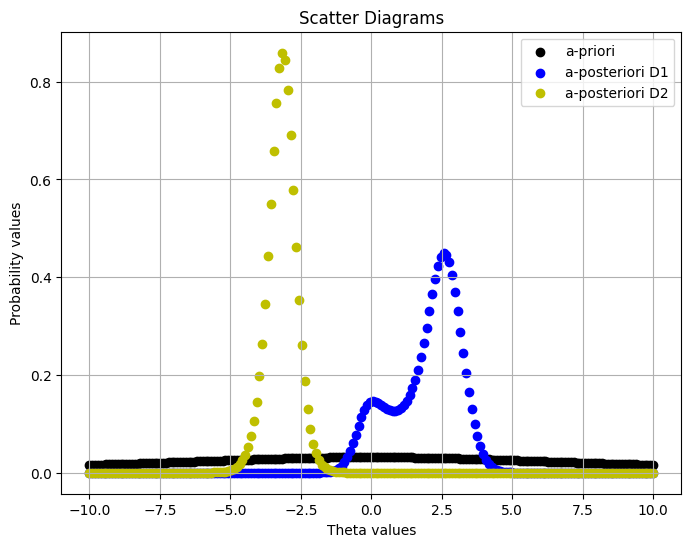

In [5]:
# Question 1.

min_theta = -10
max_theta = 10
n_theta = 200

theta_vals = np.linspace(min_theta, max_theta, n_theta);

#calculating likelihoods for D1, D2
likelihood1 = np.ones(n_theta)
likelihood2 = np.ones(n_theta)
count = 0
for t in theta_vals:
    for x1 in D1:
        temp1 = (1 / (math.pi * (1 + (x1 - t)**2)) )
        likelihood1[count] *= temp1
    for x2 in D2:
        temp2 = (1 / (math.pi * (1 + (x2 - t)**2)) )
        likelihood2[count] *= temp2
    count += 1
        
#calculating total probabilities for D1, D2, using the trapezium rule
h = theta_vals[1] - theta_vals[0]
total_prob1 = 0
total_prob2 = 0
# theta_vals[1]:theta_vals[998] mult by h
for i in range(1, n_theta - 1):
    temp1 = likelihood1[i] / (10*math.pi * (1 + (theta_vals[i]/10)**2))
    total_prob1 += (h * temp1)
    
    temp2 = likelihood2[i] / (10*math.pi * (1 + (theta_vals[i]/10)**2))
    total_prob2 += (h * temp2)
    
# adding first and last value mult by h/2
temp1 = likelihood1[0] / (10*math.pi * (1 + (theta_vals[0]/10)**2))
total_prob1 += ((h/2) * temp1)

temp1 = likelihood1[n_theta-1] / (10*math.pi * (1 + (theta_vals[n_theta-1]/10)**2)) #theta_val[999]
total_prob1 += ((h/2) * temp1)


temp2 = likelihood2[0] / (10*math.pi * (1 + (theta_vals[0]/10)**2))
total_prob2 += ((h/2) * temp2)

temp2 = likelihood2[n_theta-1] / (10*math.pi * (1 + (theta_vals[n_theta-1]/10)**2)) #theta_val[999]
total_prob2 += ((h/2) * temp2)


# Now calculating a-posteriori for D1 and D2 (posterioris1, posterioris2), for every theta_val

posterioris1 = np.zeros(n_theta)
posterioris2 = np.zeros(n_theta)
prioris = np.zeros(n_theta)

#for every theta_val
for i in range(n_theta):
    
    #calculating priori for theta (same for D1, D2)
    prioris[i] = ( 1 / ( 10*math.pi * ( 1 + (theta_vals[i] / 10)**2 ) ))
        
    #calculating posteriori for theta, D1    
    posterioris1[i] = (likelihood1[i] * prioris[i]) / total_prob1
        
    #calculating posteriori for theta, D2    
    posterioris2[i] = (likelihood2[i] * prioris[i]) / total_prob2
    
# creating diagrams for a-posteriori1, a-posteriori2, a-priori probabilities
rcParams["figure.figsize"] = (8,6) 

plt.scatter(theta_vals, prioris, color='k', label='a-priori')
plt.scatter(theta_vals, posterioris1, color='b', label='a-posteriori D1')
plt.scatter(theta_vals, posterioris2, color='y', label='a-posteriori D2')

plt.xlabel("Theta values")
plt.ylabel("Probability values")
plt.title("Scatter Diagrams")

plt.grid()
plt.legend()
plt.show()

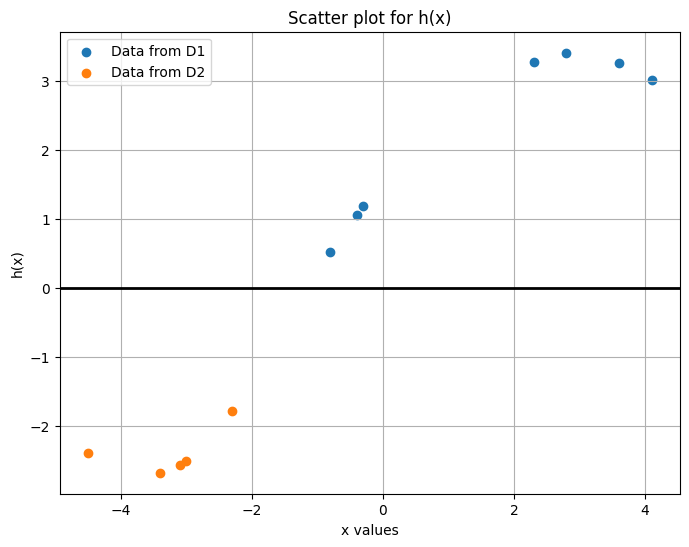

In [6]:
# Question 2.

# creating Classifier class with 2 methods
class Classifier_2:
    
    # method fit for calculating log-likelihoods for each x in D
    # inputs: Dataset D with all samples, vector of thetas
    def fit(D, theta_vals):
        
        #calculating a-posteriori for each x (p(x|D)), using the trapezium rule
        n_theta = len(theta_vals)
        n_x = len(D)
        x_posterioris1 = np.zeros(n_x)
        x_posterioris2 = np.zeros(n_x)
        count = 0
        
        for x in D:
            # calculating p(x|D1)
            for i in range(1, n_theta - 1):
                temp = posterioris1[i] / (math.pi * (1 + (x - theta_vals[i])**2)) 
                x_posterioris1[count] += temp
        
            # adding first and last value mult by h/2
            temp = posterioris1[0] / (math.pi * (1 + (x - theta_vals[0])**2)) 
            x_posterioris1[count] += ((h/2) * temp)
            
            temp = posterioris1[n_theta-1] / (math.pi * (1 + (x - theta_vals[n_theta-1])**2)) 
            x_posterioris1[count] += ((h/2) * temp)
            
            # calculating p(x|D2)
            for i in range(1, n_theta - 1):
                temp = posterioris2[i] / (math.pi * (1 + (x - theta_vals[i])**2)) 
                x_posterioris2[count] += temp
        
            # adding first and last value mult by h/2
            temp = posterioris2[0] / (math.pi * (1 + (x - theta_vals[0])**2)) 
            x_posterioris2[count] += ((h/2) * temp)
            
            temp = posterioris2[n_theta-1] / (math.pi * (1 + (x - theta_vals[n_theta-1])**2)) 
            x_posterioris2[count] += ((h/2) * temp)
            
            count += 1
            
        return(x_posterioris1, x_posterioris2)
    
    # method predict for calculating h values for every x
    # inputs: Dataset D, vector of thetas, priori_1 of class ω1, priori_2 of class ω2
    def predict(D1, D2, theta_vals, priori_1, priori_2):
        D = np.concatenate((D1,D2), axis=None)
        
        # calling fit function to calculate a-posteriori probs
        # posterioris[0] = p(x|D1) for all x from (D1UD2)
        # posterioris[1] = p(x|D2) for all x from (D1UD2)
        posterioris = Classifier_2.fit(D, theta_vals)
        size = len(D)
        h = np.zeros(size)
        
        for i in range(size):
            
            h[i] = np.log(posterioris[0][i]) - np.log(posterioris[1][i]) + np.log(priori_1) - np.log(priori_2)
        
        return(h)
    
    
priori_1 = 7/12
priori_2 = 5/12
# h_vals[0]-h_vals[6] contains h for x from D1, h_vals[7]-h_vals[12] contains h for x from D2
h_vals = Classifier_2.predict(D1, D2, theta_vals, priori_1, priori_2)

h_vals_1 = h_vals[0:7]
h_vals_2 = h_vals[7:]

# creating scatter plots for h values
plt.scatter(D1, h_vals_1,
           label='Data from D1')
plt.scatter(D2, h_vals_2,
           label='Data from D2')
plt.axhline(y=0, xmin=0, c="black", linewidth=2)


plt.title("Scatter plot for h(x)")
plt.xlabel("x values")
plt.ylabel("h(x)")
plt.grid()
plt.legend()
plt.show()

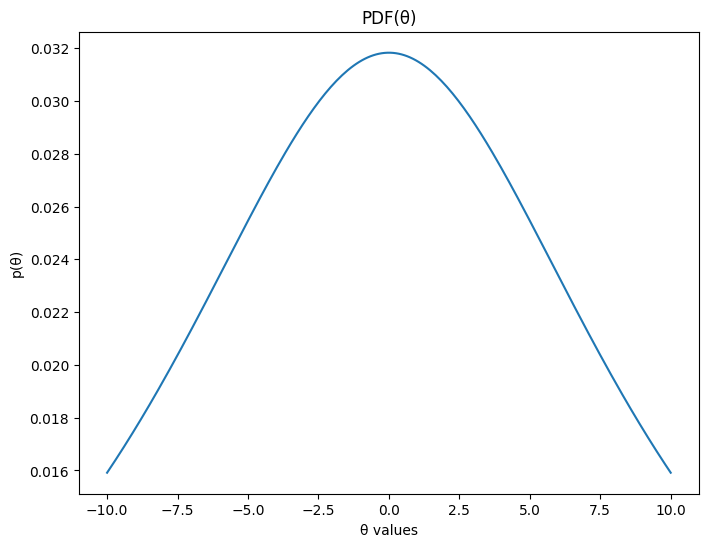

In [8]:
# creating plot for a-priori(θ)

plt.plot(theta_vals, prioris)

plt.title("PDF(θ)")
plt.xlabel("θ values")
plt.ylabel("p(θ)")
plt.show()